#레딧 크롤링

In [ ]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
import praw

reddit = praw.Reddit(client_id='5x41unSlZr0M_Fgq0DN2tQ',
                     client_secret='ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ',
                     user_agent='siseo',
                     username='siseo_98',
                     password='tk2454612!')

In [ ]:
hot_posts = reddit.subreddit('APPLE').hot(limit=10)
for post in hot_posts:
    print(post.title)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



hamburger
hamburger
What did Mark Zuckerberg eat at McDonald’s in Japan, and is it as great as he says it is?
Hamburger
GustocheSpiazza
this is a burger
Hamburger
Bourger cat
Burger: Which one is real? AI Image #ai
cheese best no pickl


In [ ]:
new_posts = reddit.subreddit('AAPL').new(limit=100)
for post in new_posts:
    print(post.title)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Apple scores record 13 Academy Award nominations, as culture-moving feature “Killers of the Flower Moon” lands 10 historic nominations for Best Picture, Best Actress for Lily Gladstone and Best Director for Martin Scorsese
a breakdown of AAPL's green & red streaks in the past year
S&P500 Prints Record Highs | $SAVE $AMD $TSLA $MARA $AAPL | Most Active ...
$SAVE $AMD $TSLA $PLUG $MARA $AAPL $AGFY $F $LCID $RIVN Most Active Stoc...
Apple Hongdae to welcome its first customers this Saturday, January 20, in South Korea
Apple previews new entertainment experiences launching with Apple Vision Pro
Apple Vision Pro available in the U.S. on February 2
Stock market news today: Tech lags as Apple falls for 4th straight day ahead of Dec. jobs data
Tim Apple needs to make some changes.... [small rant]
Should i buy aapl now if i just want it to sit?? or do i go for something else
What kind of idiot has 4 product lines but can’t sell one of them over the holiday due to a patent infringement?
Apple ex

# 크롤링 데이터 자연어 처리


In [ ]:
import pandas as pd

In [ ]:
new_posts = reddit.subreddit('AAPL').new(limit=100)
# 각 게시글의 제목을 리스트로 저장
titles = [post.title for post in new_posts]
# 리스트를 DataFrame으로 변환
df = pd.DataFrame(titles, columns=['title'])
print(df)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                title
0   Apple scores record 13 Academy Award nominatio...
1   a breakdown of AAPL's green & red streaks in t...
2   S&P500 Prints Record Highs | $SAVE $AMD $TSLA ...
3   $SAVE $AMD $TSLA $PLUG $MARA $AAPL $AGFY $F $L...
4   Apple Hongdae to welcome its first customers t...
..                                                ...
95           Apple net sales by geography, visualized
96  Apple Costs segmented and visualized [Finchart...
97  Apple Revenue segmented and visualized [Fincha...
98  Tim on to something? I think the meta verse as...
99  Ray Wang, principal analyst and founder of Con...

[100 rows x 1 columns]


In [ ]:
!pip install nltk

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# NLTK Data 다운로드
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 불용어 목록
stop_words = set(stopwords.words('english'))

In [ ]:
def process_text(text):
    # 소문자 변환
    text = text.lower()
    # 특수 문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 토큰화
    tokens = word_tokenize(text)
    # 불용어 제거
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

In [ ]:
# 각 게시글에 대해 텍스트 처리 함수 적용
df['processed_title'] = df['title'].apply(process_text)

print(df['processed_title'])

0     [apple, scores, record, 13, academy, award, no...
1     [breakdown, aapls, green, red, streaks, past, ...
2     [sp500, prints, record, highs, save, amd, tsla...
3     [save, amd, tsla, plug, mara, aapl, agfy, f, l...
4     [apple, hongdae, welcome, first, customers, sa...
                            ...                        
95           [apple, net, sales, geography, visualized]
96    [apple, costs, segmented, visualized, finchart...
97    [apple, revenue, segmented, visualized, fincha...
98    [tim, something, think, meta, verse, investmen...
99    [ray, wang, principal, analyst, founder, const...
Name: processed_title, Length: 100, dtype: object


# 긍정/부정 단어 리스트를 통한 긍정/부정 감성분석

In [ ]:
from nltk.corpus import opinion_lexicon

In [ ]:
# NLTK Data 다운로드
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [ ]:
# 긍정/부정 단어 리스트
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [ ]:
def calculate_sentiment(tokens):
    # 긍정 단어와 부정 단어의 수를 계산
    pos_count = sum(1 for token in tokens if token in positive_words)
    neg_count = sum(1 for token in tokens if token in negative_words)
    # 감성 점수를 계산 (긍정 단어 수 - 부정 단어 수)
    return pos_count - neg_count

In [ ]:
# 감성 점수 계산
df['sentiment_score'] = df['processed_title'].apply(calculate_sentiment)

print(df['sentiment_score'])

0     4
1    -1
2     0
3     0
4     1
     ..
95    0
96    0
97    0
98    0
99    2
Name: sentiment_score, Length: 100, dtype: int64


In [ ]:
# 감성 점수가 양수인 경우 긍정, 음수인 경우 부정으로 판단
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative')

# 긍정적인 게시글과 부정적인 게시글의 수를 세기
sentiment_counts = df['sentiment'].value_counts()

# 전체 게시글 수로 나눠서 비율을 계산
sentiment_percent = sentiment_counts / len(df) * 100

print(sentiment_percent)

negative    83.0
positive    17.0
Name: sentiment, dtype: float64


# 주가예측 LSTM (감성분석 결과 적용)

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
# 'AAPL' 주식의 가격 데이터 다운로드
data = yf.download('AAPL', start='2019-01-01', end='2024-01-24')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
import numpy as np
import os
from numpy import array
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [ ]:
df = pd.DataFrame(data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.893337,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.118877,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.575390,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.496208,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.172874,164101200


In [ ]:
df.shape

(1273, 6)

In [ ]:
df1=df.reset_index()['Close'];df1

0        39.480000
1        35.547501
2        37.064999
3        36.982498
4        37.687500
           ...    
1268    182.679993
1269    188.630005
1270    191.559998
1271    193.889999
1272    195.179993
Name: Close, Length: 1273, dtype: float64

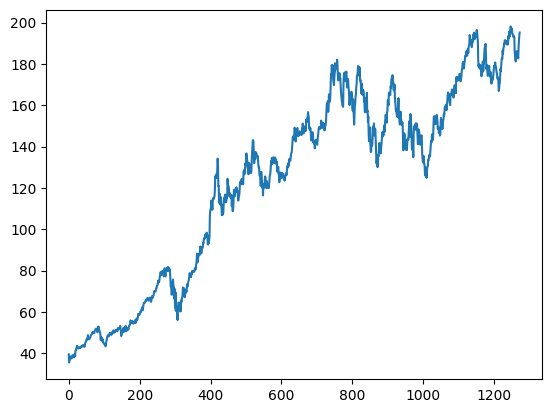

In [ ]:
plt.plot(df1);plt.show()

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1));df1

array([[0.02419069],
       [0.        ],
       [0.00933486],
       ...,
       [0.95970779],
       [0.97404075],
       [0.98197611]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
print(training_size,test_size)

1018 255


In [ ]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape),print(X_test.shape), print(ytest.shape)

(917, 100)
(917,)
(154, 100)
(154,)


(None, None, None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_15 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=0)

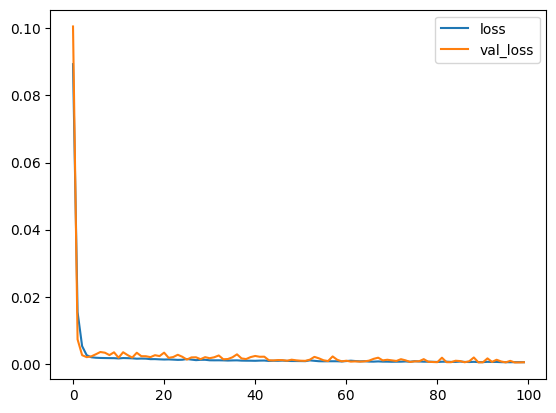

In [ ]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [ ]:
train_predict=model.predict(X_train) #prediction
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 6ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

123.88959282254045
182.0947520559061


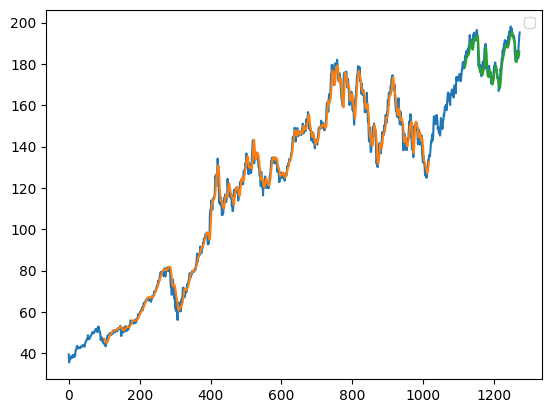

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

In [ ]:
x_input=test_data[154:].reshape(1,-1) #len(test_data)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.93565548 0.93700881 0.94678973 0.94826603 0.90649752 0.87358706
 0.87740095 0.88465975 0.86583623 0.85297966 0.86239142 0.85790077
 0.87610919 0.88287586 0.86085355 0.85125716 0.85654744 0.8644829
 0.83913883 0.82972698 0.83132642 0.83452522 0.85014994 0.8418454
 0.84959633 0.85728568 0.87315651 0.88238373 0.8786928  0.88736641
 0.89296428 0.88152253 0.8807228  0.87106493 0.86300651 0.86066901
 0.84479818 0.84553633 0.84824299 0.83384855 0.80795078 0.81613226
 0.82886578 0.83181855 0.85150327 0.87364864 0.86798919 0.88386002
 0.89979243 0.90637446 0.90342178 0.92796613 0.91812381 0.93436372
 0.93787001 0.9483276  0.94820455 0.95903112 0.95404844 0.95816992
 0.94992695 0.94881964 0.95257205 0.94623603 0.9498039  0.95773936
 0.9466051  0.97114954 0.96438297 0.97637834 0.98523649 0.96967315
 0.979085   0.99907732 1.         0.99667824 0.98634371 0.99280278
 0.97982315 0.97890037 0.97225686 0.96887353 0.96948862 0.9721338
 0.96567473 0.92329103 0.91474048 0.90034604 0.895855

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

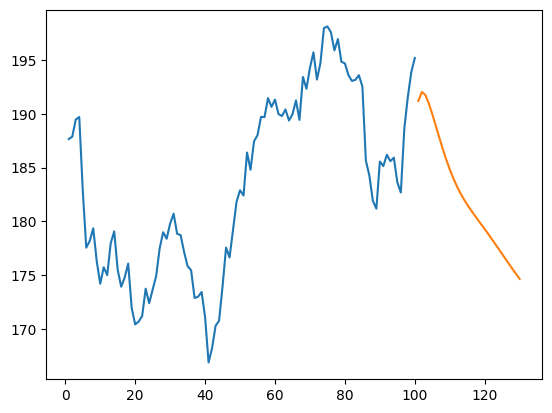

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1173:])) #len(df1)
plt.plot(day_pred,scaler.inverse_transform(lst_output))

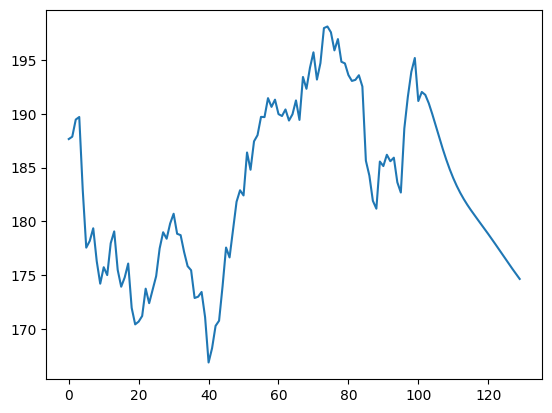

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3[1173:])

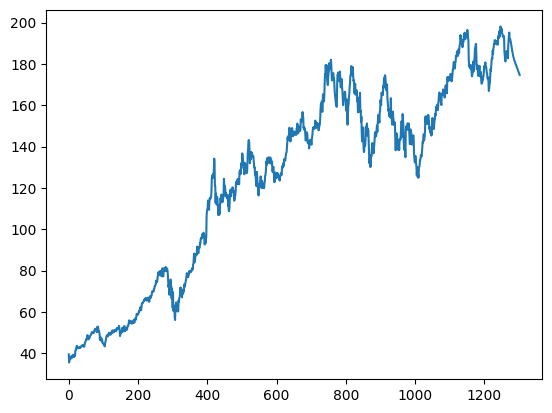

In [ ]:
plt.plot(df3)